In [15]:
# imports 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
import gmpy2 as gm


npa= np.array

In [ ]:
#import fitted params generated from jupyter notebook "FitModels_Experiment1"

opt_QL= pd.read_csv('RLParams.csv') 
opt_FOR= pd.read_csv('ForagingParams.csv') 


In [16]:
####### failed convergence handling #######

opt_QL = opt_QL.loc[opt_QL['succ']==True]
opt_FOR = opt_FOR.loc[opt_FOR['succ']==True]

#ne prends que les sujets en commun
subs = [sub for sub in (opt_FOR['sub'].unique()) if sub in opt_QL['sub'].unique()]


#### Figures layout

In [17]:
Fcol='mediumseagreen'
Qcol='darkkhaki'

tick_fontsize = 15  
Fcol='mediumseagreen'
Qcol='darkkhaki'
col = [Qcol,Fcol]
dot_size = 160

font = {'family': 'arial',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }

yfont = {'family': 'arial',
        'color':  'black',
        'weight': 'normal',
        'size': 17,
        }
xfont = {'family': 'arial',
         
        'color':  'black',
        'weight': 'normal',
        'size': 17,
        }

def set_global_plot_style():
    

    # Set global rcParams
    plt.rcParams['svg.fonttype'] = 'none'
    plt.rcParams['font.family'] = 'arial'
    plt.rcParams['legend.fontsize'] = xfont['size']
    plt.rcParams['legend.frameon'] = False
    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.rcParams['xtick.major.size'] = 2
    plt.rcParams['ytick.major.size'] = 2
    plt.rcParams['xtick.major.width'] = 1.5
    plt.rcParams['ytick.major.width'] = 1.5
    plt.rcParams['xtick.labelsize'] = tick_fontsize
    plt.rcParams['ytick.labelsize'] = tick_fontsize
    plt.rcParams['axes.labelsize'] = xfont['size']
    plt.rcParams['axes.labelcolor'] = xfont['color']
    plt.rcParams['axes.titleweight'] = font['weight']
    plt.rcParams['axes.titlesize'] = font['size']
    plt.rcParams['axes.titlecolor'] = font['color']
    plt.rcParams['svg.fonttype'] = 'none'
    


# Apply the global style
set_global_plot_style()

#### Loglikelihood plot

Text(0, 0.5, '-log likelihood')

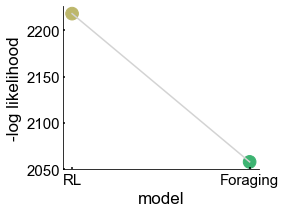

In [18]:
models = ['RL', 'Foraging']
y = [opt_QL['likelihood'].sum(), opt_FOR['likelihood'].sum()]

#plot

plt.figure(figsize=(3.5, 3))
plt.scatter(models, y, color=col, s=dot_size)
plt.plot(models,y, c='lightgrey' )

#set labels
plt.xlabel("model",fontdict=xfont)  
plt.ylabel("-log likelihood",fontdict=yfont) 


#### AIC plot

In [19]:
#compute AIC

def AIC(ll, k):
    AIC = 2*k  + 2*ll
    return AIC

AIC_QL = AIC(opt_QL['likelihood'].sum(), 2*len(opt_QL))
AIC_FOR = AIC(opt_FOR['likelihood'].sum(), 3*len(opt_FOR))


Text(0, 0.5, '-log likelihood')

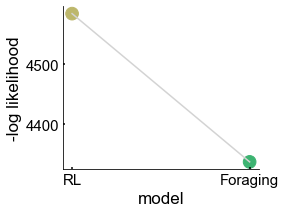

In [20]:
models = ['RL', 'Foraging']
y = [AIC_QL, AIC_FOR]

#plot

plt.figure(figsize=(3.5, 3))
plt.scatter(models, y, color=col, s=dot_size)
plt.plot(models,y, c='lightgrey' )

#set labels
plt.xlabel("model",fontdict=xfont)  
plt.ylabel("-log likelihood",fontdict=yfont) 


#### STATS

In [21]:
def delta_AIC(model_aic):
    delta_AIC = model_aic - min(AIC_QL, AIC_FOR)
    return delta_AIC

In [22]:

print('LL QL =' ,round(opt_QL['likelihood'].sum()))
print('LL foraging =' ,round(opt_FOR['likelihood'].sum()))
print('AIC QL:', round(AIC_QL))
print( 'AIC FOR:', round(AIC_FOR))

print('-----------------------')

delta_AIC_QL = delta_AIC(AIC_QL)
delta_AIC_FOR = delta_AIC(AIC_FOR)
print('delta_AIC_FOR:', delta_AIC_FOR, '/////', 'delta_AIC_QL:', delta_AIC_QL)

print('-----------------------')

relative_ll_FOR = gm.exp(-0.5*delta_AIC_FOR)
relative_ll_QL = gm.exp(-0.5*delta_AIC_QL)
print('relative likelihood FOR:', relative_ll_FOR, '/////', 'relative likelihood QL:', relative_ll_QL)

print('-----------------------')

Aikake_w_FOR = relative_ll_FOR / (relative_ll_FOR + relative_ll_QL)
Aikake_w_QL = relative_ll_QL / (relative_ll_FOR + relative_ll_QL)
print('Aikake_w_FOR:', Aikake_w_FOR, '/////', 'Aikake_w_QL:', Aikake_w_QL)

LL QL = 2218
LL foraging = 2058
AIC QL: 4584
AIC FOR: 4338
-----------------------
delta_AIC_FOR: 0.0 ///// delta_AIC_QL: 245.7648458612921
-----------------------
relative likelihood FOR: 1.0 ///// relative likelihood QL: 4.2937998680905833e-54
-----------------------
Aikake_w_FOR: 1.0 ///// Aikake_w_QL: 4.2937998680905833e-54
